# Perceptron Classifer Example
## Setup
First, we import modules

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from classifiers.perceptron import Perceptron
from functions.plotting import plot_decision_regions

Pull in data and save to a dataframe.

In [39]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

try:
    df = pd.read_csv(s, header=None, encoding='utf-8')
except:
    df = pd.read_csv("../data/iris-dataset.csv")

df.tail()

Class Added
function added


Adjust data to create a label vector, and a matrix for the training data.

In [34]:
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100,[0,2]].values

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Plot data

In [35]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## Perceptron
With everything set up as it is, we can jump directly into building the classifier model. We train the model by attempting to predict the label based on a randomized initial set of weights. Because the initial set of weights are random, we expect that the model will not predict very well. We then calculate how much each weight needs to change to increase the accuracy of our model based on the number of misclassified examples. We then repeat this process using the new weights until we reach convergence in the number of weights that need to be updated.

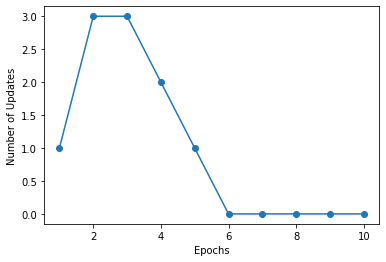

In [37]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

With the model fully trained, we can plot the same data with their lables, and show the divisions between the two regions.

<ipython-input-39-d66f15edfc5f>:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


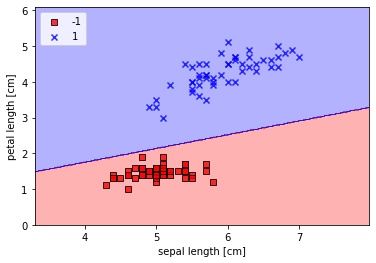

In [42]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()